## 简介
- data_X, data_Y

In [22]:
import numpy as np
import pandas as pd
from collections import Counter
import cv2
import matplotlib.pyplot as plt

## 读取数据

In [13]:
data = np.load('../Data/training_data-1.npy')
data_df = pd.DataFrame(data)
print(data_df.shape)
data_df.head()

(612, 2)


,0,1
0,"[[[238, 204, 171], [246, 231, 216], [69, 55, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[[[238, 204, 171], [246, 231, 216], [69, 57, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[[[238, 204, 171], [246, 231, 216], [69, 55, 4...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,"[[[238, 204, 171], [246, 231, 216], [63, 51, 3...","[0, 0, 0, 0, 0, 1, 0, 0, 0]"
4,"[[[238, 204, 171], [246, 231, 216], [91, 90, 8...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [30]:
data_X = data_df[0]
data_X.head(), len(data_X)

(0    [[[238, 204, 171], [246, 231, 216], [69, 55, 4...
 1    [[[238, 204, 171], [246, 231, 216], [69, 57, 4...
 2    [[[238, 204, 171], [246, 231, 216], [69, 55, 4...
 3    [[[238, 204, 171], [246, 231, 216], [63, 51, 3...
 4    [[[238, 204, 171], [246, 231, 216], [91, 90, 8...
 Name: 0, dtype: object, 612)

In [15]:
data_Y = data_df[1]
data_Y.head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0]
1    [1, 0, 0, 0, 0, 0, 0, 0, 0]
2    [0, 0, 0, 0, 1, 0, 0, 0, 0]
3    [0, 0, 0, 0, 0, 1, 0, 0, 0]
4    [0, 0, 0, 0, 1, 0, 0, 0, 0]
Name: 1, dtype: object

## 更改labels

In [16]:
data_df[1] = data_df[1].apply(str)                             # 更改data_df
data_Y = data_Y.apply(str)                                     # 更改data_Y
# data_df.head(), data_Y[:5]

(                                                   0  \
 0  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
 1  [[[238, 204, 171], [246, 231, 216], [69, 57, 4...   
 2  [[[238, 204, 171], [246, 231, 216], [69, 55, 4...   
 3  [[[238, 204, 171], [246, 231, 216], [63, 51, 3...   
 4  [[[238, 204, 171], [246, 231, 216], [91, 90, 8...   
 
                              1  
 0  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
 1  [1, 0, 0, 0, 0, 0, 0, 0, 0]  
 2  [0, 0, 0, 0, 1, 0, 0, 0, 0]  
 3  [0, 0, 0, 0, 0, 1, 0, 0, 0]  
 4  [0, 0, 0, 0, 1, 0, 0, 0, 0]  , 0    [1, 0, 0, 0, 0, 0, 0, 0, 0]
 1    [1, 0, 0, 0, 0, 0, 0, 0, 0]
 2    [0, 0, 0, 0, 1, 0, 0, 0, 0]
 3    [0, 0, 0, 0, 0, 1, 0, 0, 0]
 4    [0, 0, 0, 0, 1, 0, 0, 0, 0]
 Name: 1, dtype: object)

In [17]:
direction_dict = {
 '[0, 0, 0, 0, 0, 0, 0, 0, 0]': 'default',
 '[0, 0, 0, 0, 0, 0, 0, 0, 1]': 'NK',
 '[0, 0, 0, 0, 0, 0, 0, 1, 0]': 'SD',
 '[0, 0, 0, 0, 0, 0, 1, 0, 0]': 'SA',
 '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 'WD',
 '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 'WA',
 '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 'D',
 '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 'A',
 '[0, 1, 0, 0, 0, 0, 0, 0, 0]': 'S',
 '[1, 0, 0, 0, 0, 0, 0, 0, 0]': 'W'
}

data_df[1] = data_df[1].map(direction_dict)                  # 更改data_df
data_Y = data_Y.map(direction_dict)                          # 更改data_Y

data_df.head()

,0,1
0,"[[[238, 204, 171], [246, 231, 216], [69, 55, 4...",W
1,"[[[238, 204, 171], [246, 231, 216], [69, 57, 4...",W
2,"[[[238, 204, 171], [246, 231, 216], [69, 55, 4...",WA
3,"[[[238, 204, 171], [246, 231, 216], [63, 51, 3...",WD
4,"[[[238, 204, 171], [246, 231, 216], [91, 90, 8...",WA


In [18]:
data_Y[:5]

0     W
1     W
2    WA
3    WD
4    WA
Name: 1, dtype: object

### labels分布情况

In [19]:
counter_df = pd.DataFrame(Counter(data_Y).most_common())
counter_df

,0,1
0,W,177
1,WD,163
2,default,148
3,WA,69
4,A,41
5,D,13
6,SD,1


## 尝试导出data_X为图片

(<matplotlib.axes._subplots.AxesSubplot at 0x1ca04710>,
 Text(0.5, 1.0, 'rgb_img'),
 (-0.5, 479.5, 269.5, -0.5))

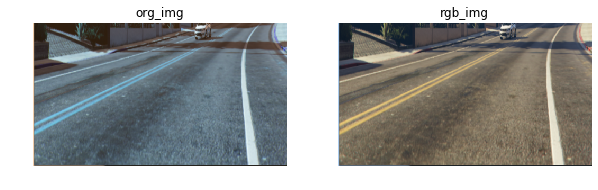

In [25]:
org_img_ndarray = data_X[3]
img_ndarray = cv2.cvtColor(org_img_ndarray, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))
plt.subplot(121), plt.imshow(org_img_ndarray), plt.title('org_img'), plt.axis("off")
plt.subplot(122), plt.imshow(img_ndarray), plt.title('rgb_img'), plt.axis("off")

In [29]:
idx = 3
img = data_X[idx]
cv2.imwrite('./%d.png'%idx, img)

True

## 批量导出data_X为图片

In [32]:
for i in range(len(data_X)):
    img = data_X[i]
    try:
        cv2.imwrite('./%d.png'%(i+1), img)
    except Exception as e:
        print(e)